In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
df = pd.read_csv("/mnt/windows/Users/Public/Documents/ECE278/project/uniqueData/uniqueMMSI_withDraft.csv")

In [35]:
df_full = pd.read_csv("/mnt/windows/Users/Public/Documents/ECE278/project/uniqueData/uniqueMMSI_withDraft.csv")
val_counts = df_full.VesselType.value_counts()
thresh = val_counts[val_counts >  100]
df_full = df_full[df_full.VesselType.isin(thresh.index)]
df_full = df_full[df_full.VesselType.notna()]

In [10]:
df.VesselType.value_counts() > 1000

70.0       True
1004.0     True
31.0       True
80.0       True
1024.0     True
          ...  
6.0       False
78.0      False
100.0     False
59.0      False
86.0      False
Name: VesselType, Length: 99, dtype: bool

In [11]:
val_counts = df.VesselType.value_counts()
thresh = val_counts[val_counts >  1000]

In [12]:
thresh.index

Float64Index([70.0, 1004.0, 31.0, 80.0, 1024.0, 90.0, 37.0, 60.0, 30.0,
              1025.0],
             dtype='float64')

In [13]:
df = df[df.VesselType.isin(thresh.index)]
df = df[df.VesselType.notna()]
df.VesselType.value_counts()
print(len(df.VesselType.unique()))

10


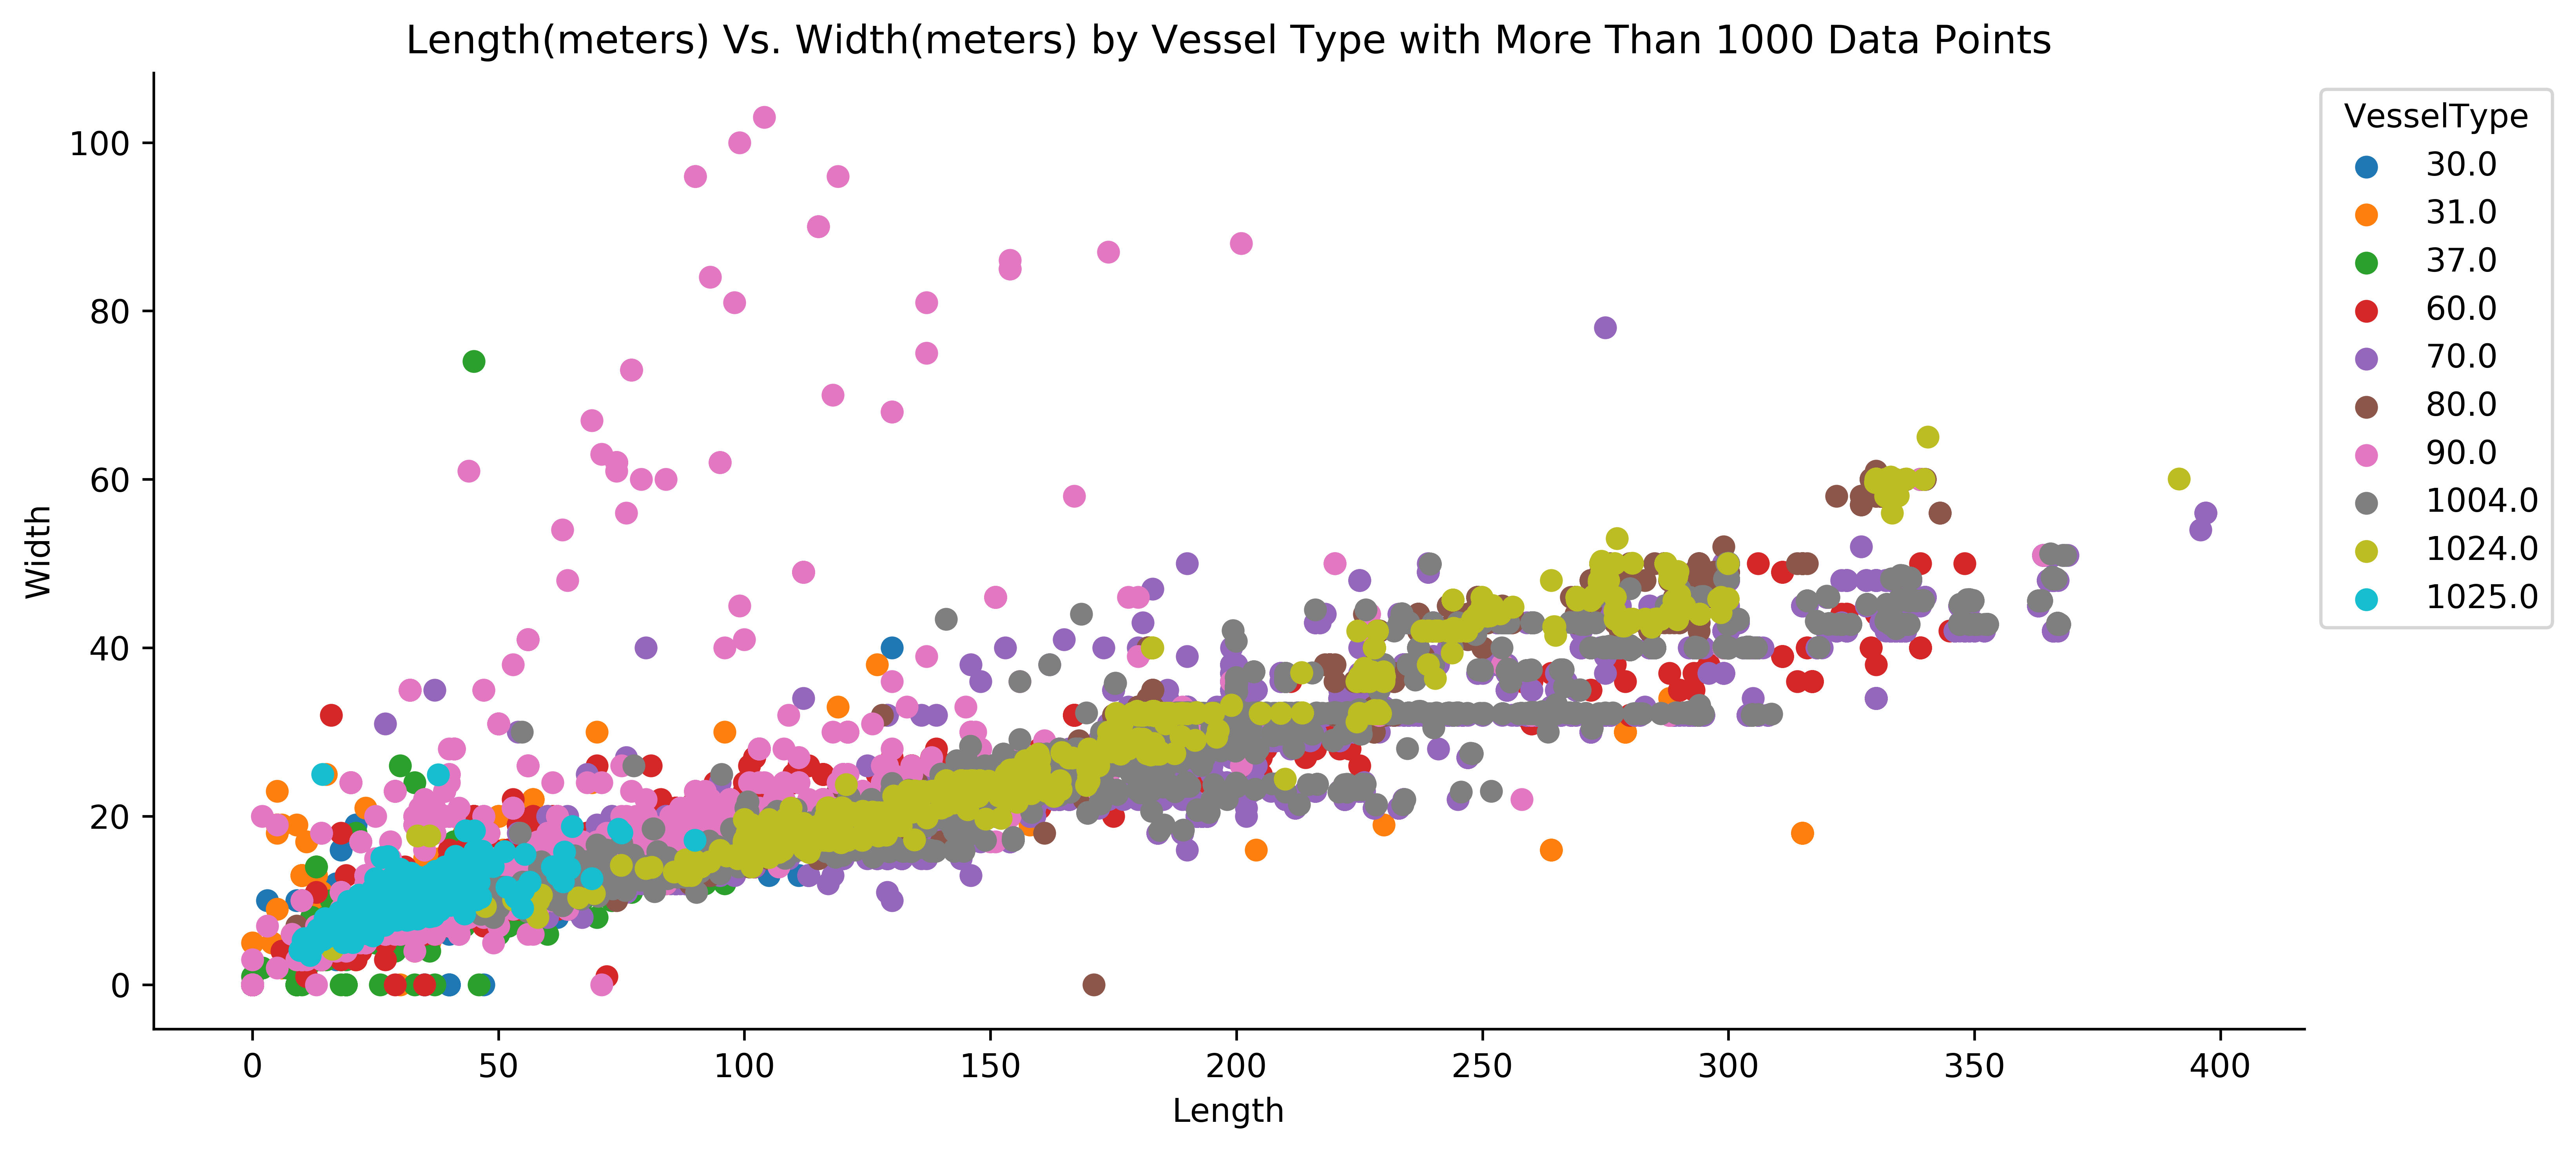

In [41]:
fg = seaborn.FacetGrid(data=df,hue="VesselType",height=5,aspect = 2)
fg.map(plt.scatter, "Length","Width")
plt.rcParams['figure.dpi']=600
plt.title("Length(meters) Vs. Width(meters) by Vessel Type with More Than 1000 Data Points")
plt.tight_layout()
plt.legend(loc="upper left",title="VesselType",bbox_to_anchor=(1, 1))
plt.savefig("scatter.png")

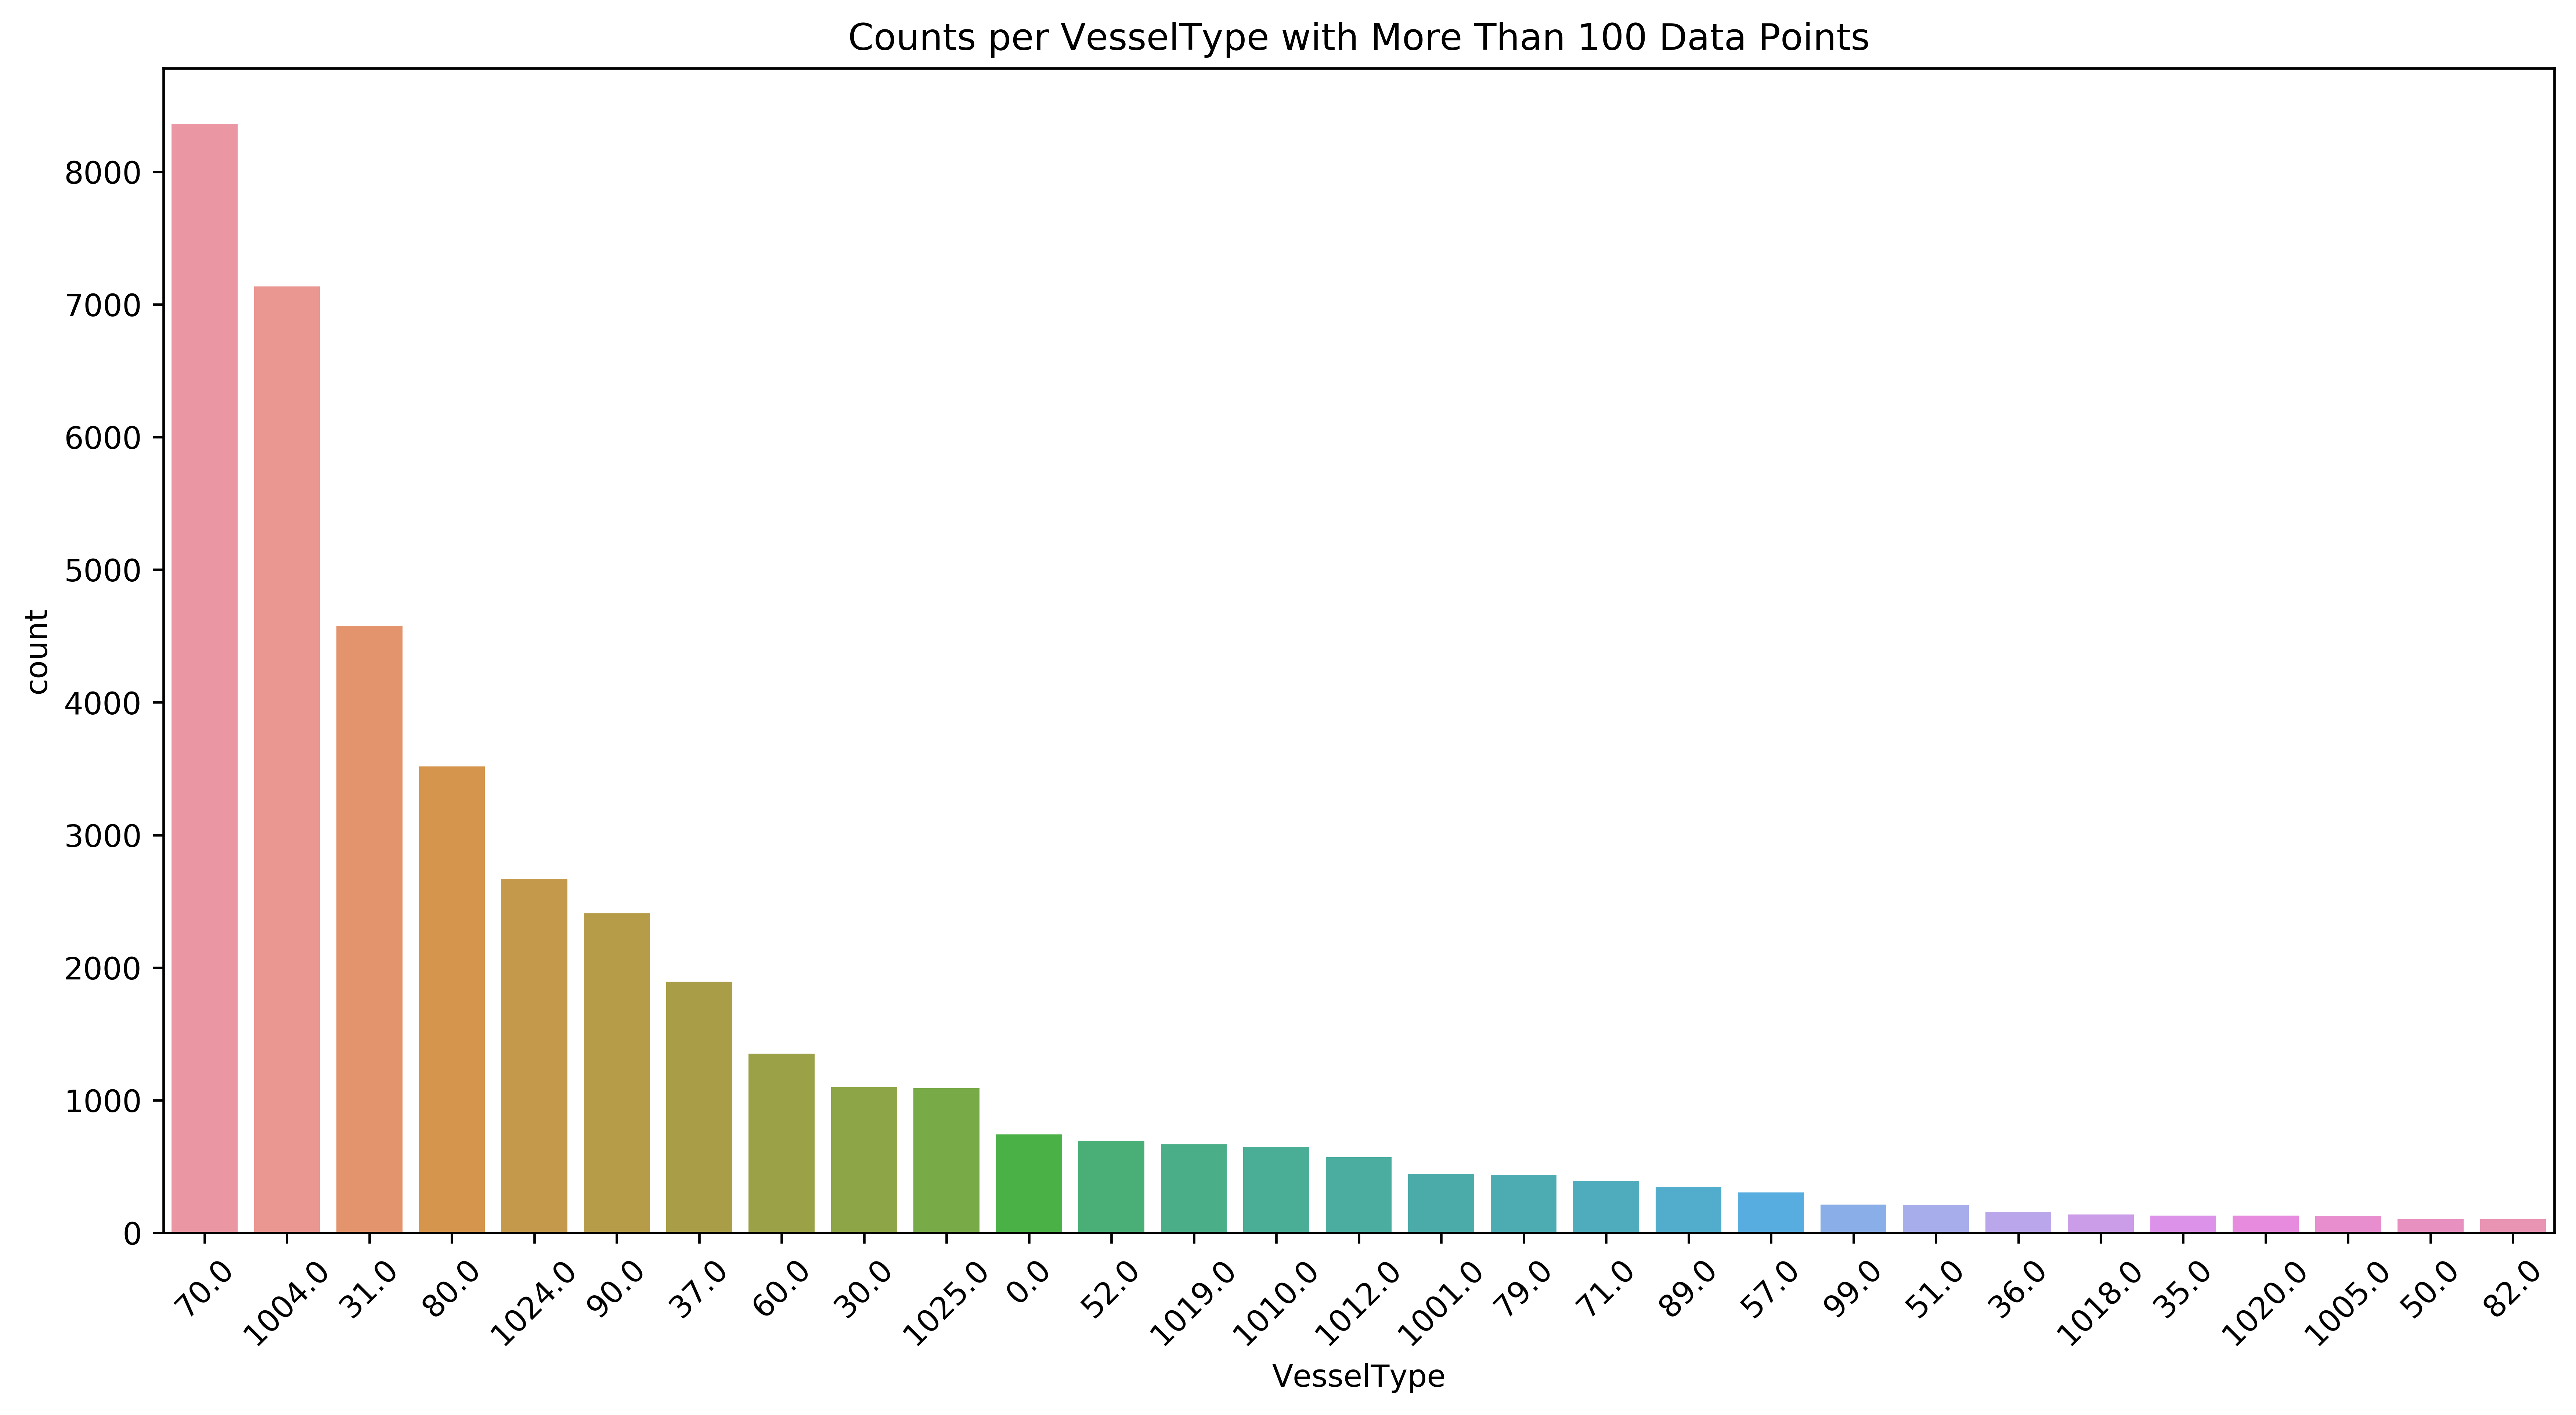

In [39]:
plt.figure(figsize=(14, 7))
plt.xticks(rotation = 45)
ax = seaborn.countplot(x="VesselType",data=df_full,order=df_full.VesselType.value_counts().index)
plt.title("Counts per VesselType with More Than 100 Data Points")
plt.rcParams['figure.dpi'] = 600
plt.savefig("counts.png")

In [7]:
df.columns

Index(['MMSI', 'VesselType', 'Length', 'Width', 'Draft', 'Cargo',
       'TransceiverClass'],
      dtype='object')

In [8]:
cd /home/matthew/Documents/classes/graduate/physical/project/ECE228Project-/src

/home/matthew/Documents/classes/graduate/physical/project/ECE228Project-/src


In [81]:
from AISDataset import AISDataSetMMSI

In [82]:
le_file = "uniqueMMSI.csv"
file_dir = "/mnt/windows/Users/Public/Documents/ECE278/project/uniqueData/"

In [83]:
dataset = AISDataSetMMSI(le_file, file_dir)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [84]:
import numpy as np
split = np.array([0.7,0.3])
data_len = len(dataset)
split_amount = split*data_len
split_amount = np.round(split_amount).astype(np.int)
print(split_amount)
assert np.sum(split_amount) == data_len


[204108  87475]


In [85]:
train_set, test_set = torch.utils.data.random_split(dataset,split_amount.tolist())

In [86]:
import models
import importlib
importlib.reload(models)
from models import TwoLayerReLU

In [87]:
unique_type = df.VesselType.unique()
zero_based = np.arange(len(unique_type))
type_dict = dict(zip(unique_type,zero_based))

In [88]:
print(dataset.df.VesselType.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [89]:
print(df.VesselType.unique())

[  80.   37.   70.   31.   30.   90.   60.   32.   36.   71.   79.   74.
   57.    0.   33.   81.   53.   51.   40.   50.   52.   89.   34.   67.
   54.   55.   99.   38.   35.   82.   84. 1024. 1001. 1025. 1004. 1012.
 1019. 1010.]


In [91]:
model = TwoLayerReLU()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.==2)

for epoch in range(10):
    train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True)
    running_loss = 0.0
    for i,(inputs,labels) in enumerate(train_loader,0):
        inputs = torch.tensor(inputs).float()
        
        labels = labels.squeeze_()
        labels = labels.type(torch.LongTensor)
        labels = torch.tensor(labels)
        optimizer.zero_grad()
        output = model(inputs)

        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        batch_size=len(labels)
        
    print("epoch:",epoch,". Loss:",running_loss/batch_size)
    running_loss = 0

<ipython-input-91-4b87855a3f52>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs).float()
<ipython-input-91-4b87855a3f52>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


epoch: 0 . Loss: 12371.928271611532
epoch: 1 . Loss: 12371.972301880518
epoch: 2 . Loss: 12372.887107213339
epoch: 3 . Loss: 12372.86066865921
epoch: 4 . Loss: 12372.622532606125
epoch: 5 . Loss: 12372.78793088595
epoch: 6 . Loss: 12372.181909243265
epoch: 7 . Loss: 12372.476048866907
epoch: 8 . Loss: 12372.350514968237
epoch: 9 . Loss: 12372.861898144087
